Baseball Case Study

Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

Importing the Library Required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
%matplotlib inline
from sklearn.linear_model import LinearRegression

Matplotlib is building the font cache; this may take a moment.


Fetching the dataset

In [6]:
df=pd.read_csv('baseball.csv')

EDA

Printing dataset

In [7]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Checking datatype and Nan Value and info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


checking data distribution 

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [11]:
df.shape

(30, 17)

Their are 30 rows and 17 columns. Win W is target variable and label is of continues datatype so it is regression problem.

checking correlation with target variable using heatmap

In [13]:
corrMatrix = df.corr()

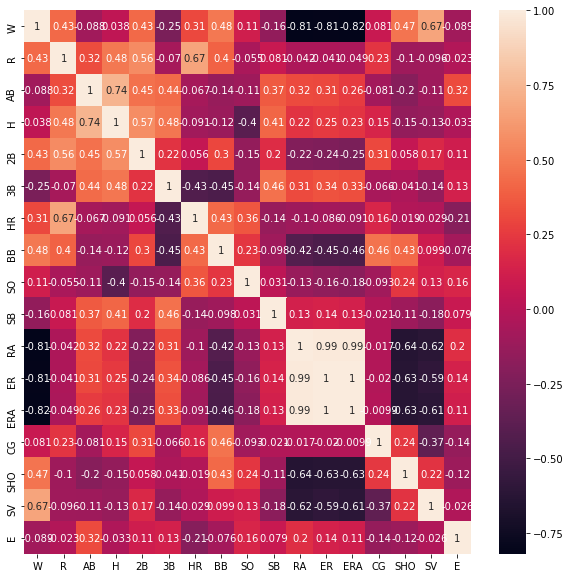

In [14]:
plt.figure(figsize=(10,10))

sn.heatmap(corrMatrix, annot=True)
plt.show()

As we can see that almost all features having good percentage of relation with target label except features SB,SO,HR,3B,H. Proceeding with selected features for evaluation.

Selecting the best features

In [17]:
X=df[['R','AB','2B','BB','RA','ER','ERA','CG','SHO','SV','E']]
y=df['W']

Bulding and traning the modle using linear regression algorithm

In [18]:
best_score=0
for i in range(201):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    #sc_y = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    #y_train = sc_y.fit_transform(y_train)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    b_score=lr.score(sc_X.transform(X_test),y_test)
    if b_score>best_score:
        best_score=b_score
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Best Score = 97.12347715454119 For Random state = 190


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 190)
    
sc_X = StandardScaler()
#sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
#y_train = sc_y.fit_transform(y_train)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Checking Performance Metrics

In [24]:
y_pred=lr.predict(sc_X.transform(X_test))

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('The R2 score={}'.format(r2_score(y_test, y_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test, y_pred)))
print('The MAE ={}'.format(mean_absolute_error(y_test, y_pred)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

The R2 score=97.12347715454119
The MSE =3.4997694619748843
The MAE =1.5048001333035899
The RMSE =1.870767078493441


By Cross validation best score and R2 Score Matching to good percent of accuracy.

Linear regression is performing well on this dataset than other regression algorithms.